In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from vis_forecast.forecast import wind_direction_score

In [4]:
wind_direction_score([0, 180],260)

-1

In [21]:
from vis_forecast.data_loader import MetOfficeDataLoader
from dotenv import load_dotenv
from loguru import logger

if not load_dotenv():
    logger.error("Failed to load .env file")


met_office = MetOfficeDataLoader()
df = met_office.update_met_data()

falmouth


2025-10-21 15:25:10.500 | INFO     | vis_forecast.data_loader:update_met_data:25 - Updated data for falmouth


towan_beach


2025-10-21 15:25:10.781 | INFO     | vis_forecast.data_loader:update_met_data:25 - Updated data for towan_beach


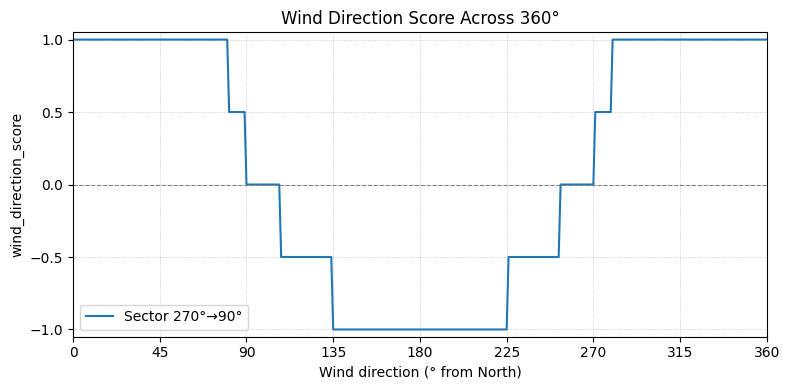

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from vis_forecast.forecast import wind_direction_score

angles = np.linspace(0, 360, 361)
sector = (270, 90)
scores = [wind_direction_score(sector, angle) for angle in angles]

plt.figure(figsize=(8, 4))
plt.plot(angles, scores, label=f"Sector {sector[0]}°→{sector[1]}°")
plt.axhline(0, color="grey", linewidth=0.8, linestyle="--")
plt.xlim(0, 360)
plt.ylim(-1.05, 1.05)
plt.xticks(np.arange(0, 361, 45))
plt.yticks(np.linspace(-1, 1, 5))
plt.xlabel("Wind direction (° from North)")
plt.ylabel("wind_direction_score")
plt.title("Wind Direction Score Across 360°")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.5)
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['time', 'maxScreenAirTemp', 'minScreenAirTemp', 'max10mWindGust',
       'significantWeatherCode', 'totalPrecipAmount', 'totalSnowAmount',
       'windSpeed10m', 'windDirectionFrom10m', 'windGustSpeed10m',
       'visibility', 'mslp', 'screenRelativeHumidity', 'feelsLikeTemp',
       'uvIndex', 'probOfPrecipitation', 'probOfSnow', 'probOfHeavySnow',
       'probOfRain', 'probOfHeavyRain', 'probOfHail', 'probOfSferics',
       'date_creation', 'forecast', 'location_name'],
      dtype='object')

In [15]:
df_tmp = df[['time', 'maxScreenAirTemp', 'minScreenAirTemp', 'max10mWindGust',
       'totalPrecipAmount', 'windSpeed10m', 'windDirectionFrom10m', 'windGustSpeed10m',
       'visibility', 'screenRelativeHumidity', 'feelsLikeTemp',
       'uvIndex', 'probOfPrecipitation', 'probOfHeavySnow',
       'probOfRain', 'probOfHeavyRain', 'probOfHail',
       'location_name']]

In [18]:
df_tmp[(df_tmp['location_name']=="falmouth")&(df_tmp["time"] >= time_now)]

,time,maxScreenAirTemp,minScreenAirTemp,max10mWindGust,totalPrecipAmount,windSpeed10m,windDirectionFrom10m,windGustSpeed10m,visibility,screenRelativeHumidity,feelsLikeTemp,uvIndex,probOfPrecipitation,probOfHeavySnow,probOfRain,probOfHeavyRain,probOfHail,location_name
328,2025-10-21 18:00:00,14.59,12.70,8.62,0.00,3.49,283,5.71,29099,85.36,11.46,0,4,0,4,3,1,falmouth
329,2025-10-21 21:00:00,12.82,11.73,6.13,0.08,3.13,260,5.10,31694,89.69,10.65,0,70,0,70,67,13,falmouth
330,2025-10-22 00:00:00,11.97,11.02,6.98,0.00,3.48,279,6.32,35301,90.15,9.69,0,4,0,4,1,0,falmouth
331,2025-10-22 03:00:00,11.46,10.65,7.02,0.00,3.06,286,5.19,30294,91.42,9.35,0,2,0,2,1,0,falmouth
332,2025-10-22 06:00:00,10.74,9.64,5.15,0.00,2.07,300,3.81,18550,91.30,9.29,0,5,0,5,1,0,falmouth
333,2025-10-22 09:00:00,12.44,9.72,3.20,0.00,1.94,217,2.84,25633,82.16,11.90,1,4,0,4,1,0,falmouth
334,2025-10-22 12:00:00,13.81,12.42,5.77,0.00,4.18,169,5.77,38005,73.50,12.07,2,12,0,12,7,1,falmouth
335,2025-10-22 15:00:00,13.76,12.74,9.12,2.27,6.03,135,8.17,7203,85.44,10.37,1,86,0,86,85,17,falmouth
336,2025-10-22 18:00:00,12.77,11.97,12.87,5.61,7.90,92,11.27,6079,94.60,9.04,0,88,0,88,86,17,falmouth
337,2025-10-22 21:00:00,12.05,11.52,13.25,1.04,5.37,347,8.15,28408,92.67,9.35,0,77,0,77,72,14,falmouth
